# Use Case 3:  Comparing Clinical Threshold for Significant Genes

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp

In [3]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [4]:
clinical = CPTAC.get_clinical()
proteomics = CPTAC.get_proteomics()

In [5]:
bmiProt = CPTAC.compare_clinical(clinical, proteomics, 'BMI')

In [6]:
highProt = bmiProt[bmiProt['BMI'] > 25]
lowProt = bmiProt[bmiProt['BMI'] < 25]

In [8]:
highMean = highProt.mean()
highMean = highMean[1:]
lowMean = lowProt.mean()
lowMean = lowMean[1:]
diff = abs(highMean - lowMean)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Difference of Means between high and low BMI')

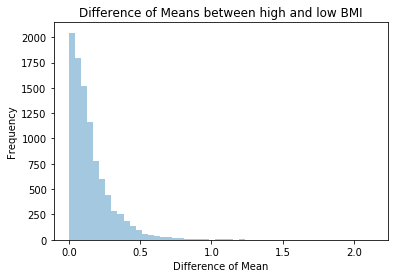

In [9]:
plot = sns.distplot(diff, kde = False)
plot.set(xlabel="Difference of Mean",ylabel="Frequency")
plot.set_title("Difference of Means between high and low BMI")
#plot.savefig("uc3BMI.pdf",dpi = 300)

In [37]:
sigDiff = diff[diff > 0.75]
gene_list = sigDiff.index.tolist()

['A2ML1', 'ACTA1', 'ADH1B', 'AGTRAP', 'AKR1C2', 'ALPP', 'ASPN', 'BBOX1', 'BPIFB1', 'C4orf19', 'C5orf15', 'CFHR3', 'CLDN10', 'CLIC5', 'COL1A1', 'COX7A1', 'CRABP2', 'CRP', 'CXCL1', 'DEFA1B', 'DKK4', 'DMBT1', 'EGFL6', 'FABP7', 'FBP1', 'FGFBP1', 'FOS', 'GLDC', 'GMNN', 'GNA14', 'GSTO2', 'HAMP', 'HIST1H1D', 'HIST2H2BF', 'HLA-DRB3', 'HSPB8', 'IGF2BP3', 'KIAA1210', 'KIAA1324L', 'KRT13', 'KRT16', 'KRT5', 'KRT6A', 'KRT6B', 'LEFTY1', 'LSAMP', 'MAP1B', 'MFAP4', 'MOB3B', 'MT3', 'NAPSA', 'NEBL', 'NLRP2', 'NOTUM', 'OVGP1', 'PADI1', 'PAEP', 'PAGE4', 'PCSK6', 'PDGFD', 'PKHD1L1', 'PLAC9', 'POSTN', 'PRR9', 'RBP1', 'RHOQ', 'RPTN', 'S100A3', 'S100A7', 'SCARA3', 'SDHC', 'SFRP4', 'SPON1', 'SPRR1B', 'SPRR3', 'TCEAL7', 'THBS4', 'THSD4', 'TMEM26', 'TNFRSF10C', 'TNFRSF19', 'TPPP3', 'UQCRH', 'VNN1', 'WNT4', 'ZNF552']


In [39]:
enr = gp.enrichr(gene_list = gene_list, description = 'BMI partitions', gene_sets = 'KEGG_2016', outdir='enrichr_kegg', cutoff=0.5)
enr.res2d

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Z-score,Combined Score,Genes,Gene_set
0,Wnt signaling pathway_Homo sapiens_hsa04310,4/142,0.003297,0.257223,0.003612,0.284282,-1.879509,10.740776,DKK4;SFRP4;NOTUM;WNT4,KEGG_2016
1,Chemical carcinogenesis_Homo sapiens_hsa05204,3/82,0.005323,0.257223,0.005981,0.284282,-1.662587,8.704819,GSTO2;ADH1B;AKR1C2,KEGG_2016
2,Rheumatoid arthritis_Homo sapiens_hsa05323,3/90,0.006890,0.257223,0.007674,0.284282,-1.717461,8.549003,CXCL1;FOS;HLA-DRB3,KEGG_2016
3,Amoebiasis_Homo sapiens_hsa05146,3/100,0.009197,0.257511,0.010153,0.284282,-1.790132,8.393747,COL1A1;GNA14;CXCL1,KEGG_2016
4,Carbon metabolism_Homo sapiens_hsa01200,3/113,0.012797,0.286658,0.014002,0.313650,-1.608748,7.011770,GLDC;SDHC;FBP1,KEGG_2016
5,Oxidative phosphorylation_Homo sapiens_hsa00190,3/133,0.019710,0.339844,0.021354,0.367612,-1.698161,6.668026,SDHC;COX7A1;UQCRH,KEGG_2016
6,Non-alcoholic fatty liver disease (NAFLD)_Homo...,3/151,0.027384,0.339844,0.029480,0.367612,-1.782356,6.412587,SDHC;COX7A1;UQCRH,KEGG_2016
7,Parkinson's disease_Homo sapiens_hsa05012,3/142,0.023374,0.339844,0.025238,0.367612,-1.624624,6.102275,SDHC;COX7A1;UQCRH,KEGG_2016
8,Glycolysis / Gluconeogenesis_Homo sapiens_hsa0...,2/67,0.033738,0.339844,0.036663,0.367612,-1.727376,5.854315,ADH1B;FBP1,KEGG_2016
9,Alzheimer's disease_Homo sapiens_hsa05010,3/168,0.035893,0.339844,0.038469,0.367612,-1.591569,5.295503,SDHC;COX7A1;UQCRH,KEGG_2016
